In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

## Load Partial Model

In [6]:
from prophet.serialize import model_to_json, model_from_json

with open('Complete_mv_model.json', 'r') as fin:
    saved_mv_model = model_from_json(fin.read())  # Load model

## Load processed Future Data

In [7]:
future_df = pd.read_csv('processed_future_data.csv')

In [8]:
future_df.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
future_df

,Date,temp,dew,humidity,windspeed,winddir,cloudcover,visibility
0,2022-06-13 00:00:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
1,2022-06-13 00:15:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
2,2022-06-13 00:30:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
3,2022-06-13 00:45:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
4,2022-06-13 01:00:00,35.0,15.0,30.28,9.4,230.0,50.0,3.0
...,...,...,...,...,...,...,...,...
1340,2022-06-26 23:00:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1341,2022-06-26 23:15:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1342,2022-06-26 23:30:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1343,2022-06-26 23:45:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1


In [10]:
future_df.rename(columns={'Date':'ds'}, inplace=True)

In [11]:
future_df

,ds,temp,dew,humidity,windspeed,winddir,cloudcover,visibility
0,2022-06-13 00:00:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
1,2022-06-13 00:15:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
2,2022-06-13 00:30:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
3,2022-06-13 00:45:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
4,2022-06-13 01:00:00,35.0,15.0,30.28,9.4,230.0,50.0,3.0
...,...,...,...,...,...,...,...,...
1340,2022-06-26 23:00:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1341,2022-06-26 23:15:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1342,2022-06-26 23:30:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1343,2022-06-26 23:45:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1


In [25]:
future_df['cap'] = 9000

## Make predictions on Future Data

In [26]:
predictions = saved_mv_model.predict(future_df)

In [27]:
predictions

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,...,windspeed,windspeed_lower,windspeed_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-06-13 00:00:00,8999.993652,9000,8859.307088,11031.501016,8999.983453,8999.997050,954.049081,954.049081,954.049081,...,-13.753607,-13.753607,-13.753607,468.502214,468.502214,468.502214,0.0,0.0,0.0,9954.042733
1,2022-06-13 00:15:00,8999.993653,9000,8939.334477,10972.645832,8999.983454,8999.997050,924.195014,924.195014,924.195014,...,-13.753607,-13.753607,-13.753607,469.233430,469.233430,469.233430,0.0,0.0,0.0,9924.188667
2,2022-06-13 00:30:00,8999.993653,9000,8784.409272,10947.460410,8999.983455,8999.997050,899.657664,899.657664,899.657664,...,-13.753607,-13.753607,-13.753607,469.964989,469.964989,469.964989,0.0,0.0,0.0,9899.651317
3,2022-06-13 00:45:00,8999.993654,9000,8835.652304,10972.676742,8999.983455,8999.997051,880.342447,880.342447,880.342447,...,-13.753607,-13.753607,-13.753607,470.696892,470.696892,470.696892,0.0,0.0,0.0,9880.336101
4,2022-06-13 01:00:00,8999.993654,9000,8804.914597,10901.238730,8999.983456,8999.997051,817.798433,817.798433,817.798433,...,-13.753607,-13.753607,-13.753607,471.429138,471.429138,471.429138,0.0,0.0,0.0,9817.792087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,2022-06-26 23:00:00,8999.994237,9000,7837.209753,9990.353431,8999.984507,8999.997366,-86.856387,-86.856387,-86.856387,...,-145.664594,-145.664594,-145.664594,1535.165914,1535.165914,1535.165914,0.0,0.0,0.0,8913.137850
1341,2022-06-26 23:15:00,8999.994237,9000,7759.132028,9884.024508,8999.984507,8999.997367,-136.631595,-136.631595,-136.631595,...,-145.664594,-145.664594,-145.664594,1535.844780,1535.844780,1535.844780,0.0,0.0,0.0,8863.362642
1342,2022-06-26 23:30:00,8999.994238,9000,7784.131529,9882.318476,8999.984508,8999.997367,-182.037600,-182.037600,-182.037600,...,-145.664594,-145.664594,-145.664594,1536.523216,1536.523216,1536.523216,0.0,0.0,0.0,8817.956637
1343,2022-06-26 23:45:00,8999.994238,9000,7696.229688,9915.771128,8999.984509,8999.997367,-222.517226,-222.517226,-222.517226,...,-145.664594,-145.664594,-145.664594,1537.201224,1537.201224,1537.201224,0.0,0.0,0.0,8777.477012


In [28]:
future_predictions = predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [29]:
future_predictions

,ds,yhat,yhat_lower,yhat_upper
0,2022-06-13 00:00:00,9954.042733,8859.307088,11031.501016
1,2022-06-13 00:15:00,9924.188667,8939.334477,10972.645832
2,2022-06-13 00:30:00,9899.651317,8784.409272,10947.460410
3,2022-06-13 00:45:00,9880.336101,8835.652304,10972.676742
4,2022-06-13 01:00:00,9817.792087,8804.914597,10901.238730
...,...,...,...,...
1340,2022-06-26 23:00:00,8913.137850,7837.209753,9990.353431
1341,2022-06-26 23:15:00,8863.362642,7759.132028,9884.024508
1342,2022-06-26 23:30:00,8817.956637,7784.131529,9882.318476
1343,2022-06-26 23:45:00,8777.477012,7696.229688,9915.771128


## Plot Predictions

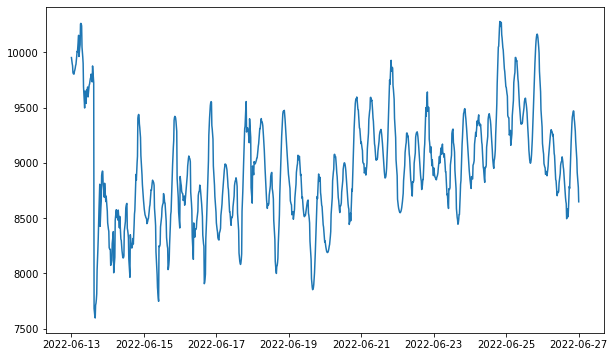

In [30]:
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(future_predictions['ds'], future_predictions['yhat'])

In [31]:
factual = pd.read_csv('future_actual_load.csv')

In [32]:
factual

,Unnamed: 0,Date,Haryana Load (MW)
0,0,2022-06-14 00:15:00,9000.18
1,1,2022-06-14 00:30:00,8768.38
2,2,2022-06-14 00:45:00,8777.00
3,3,2022-06-14 01:00:00,9093.66
4,4,2022-06-14 01:15:00,9082.27
...,...,...,...
564,564,2022-06-19 22:45:00,7538.72
565,565,2022-06-19 23:00:00,7307.08
566,566,2022-06-19 23:15:00,7204.57
567,567,2022-06-19 23:30:00,7194.45


In [33]:
future_predictions

,ds,yhat,yhat_lower,yhat_upper
0,2022-06-13 00:00:00,9954.042733,8859.307088,11031.501016
1,2022-06-13 00:15:00,9924.188667,8939.334477,10972.645832
2,2022-06-13 00:30:00,9899.651317,8784.409272,10947.460410
3,2022-06-13 00:45:00,9880.336101,8835.652304,10972.676742
4,2022-06-13 01:00:00,9817.792087,8804.914597,10901.238730
...,...,...,...,...
1340,2022-06-26 23:00:00,8913.137850,7837.209753,9990.353431
1341,2022-06-26 23:15:00,8863.362642,7759.132028,9884.024508
1342,2022-06-26 23:30:00,8817.956637,7784.131529,9882.318476
1343,2022-06-26 23:45:00,8777.477012,7696.229688,9915.771128


In [34]:
future_predictions.index[future_predictions['ds'] == '2022-06-14 00:15:00']

Int64Index([97], dtype='int64')

In [35]:
future_predictions.index[future_predictions['ds'] == '2022-06-19 23:45:00']

Int64Index([671], dtype='int64')

In [36]:
future_predictions = future_predictions[97:672]

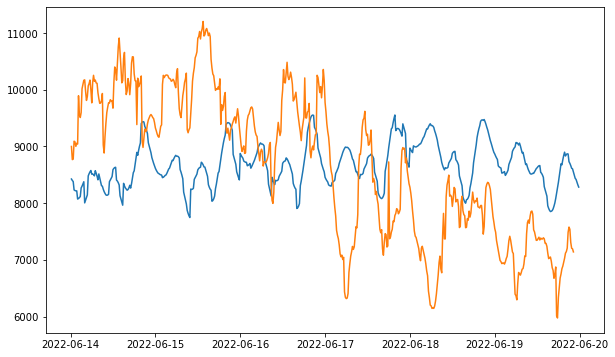

In [37]:
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(future_predictions['ds'], future_predictions['yhat'])
plt.plot(future_predictions['ds'][:569], factual['Haryana Load (MW)'])